In [2]:
import pandas as pd
df= pd.read_csv("retail_sales_dataset.csv")
df

,id,quantity,price_per_unit,total_sales,discount_percent,product_category,store_location,payment_method,customer_type
0,1,5,478,2390,10,Books,Los Angeles,Cash,VIP
1,2,7,353,2471,0,Books,Los Angeles,Online Payment,New
2,3,8,73,584,20,Groceries,Chicago,Online Payment,New
3,4,18,480,8640,5,Electronics,Miami,Credit Card,New
4,5,6,357,2142,10,Electronics,Miami,Cash,Regular
...,...,...,...,...,...,...,...,...,...
195,196,20,354,7080,5,Books,Los Angeles,Online Payment,VIP
196,197,11,481,5291,5,Clothing,Chicago,Debit Card,Returning
197,198,9,407,3663,0,Furniture,Miami,Online Payment,Regular
198,199,14,393,5502,10,Clothing,Los Angeles,Debit Card,Regular


In [3]:
df.describe()

,id,quantity,price_per_unit,total_sales,discount_percent
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,10.730000,261.730000,2849.450000,9.625000
std,57.879185,6.095315,146.866798,2519.591679,6.998519
min,1.000000,1.000000,5.000000,22.000000,0.000000
25%,50.750000,5.000000,128.000000,751.500000,5.000000
50%,100.500000,11.000000,277.500000,2060.000000,10.000000
75%,150.250000,17.000000,389.250000,4504.500000,15.000000
max,200.000000,20.000000,498.000000,9760.000000,20.000000


In [4]:
store_locations = df['store_location'].unique()
print(store_locations)

['Los Angeles' 'Chicago' 'Miami' 'New York' 'Houston']


In [5]:
store_counts = df['store_location'].value_counts()
print(store_counts)

store_location
Chicago        55
Miami          43
New York       35
Houston        35
Los Angeles    32
Name: count, dtype: int64


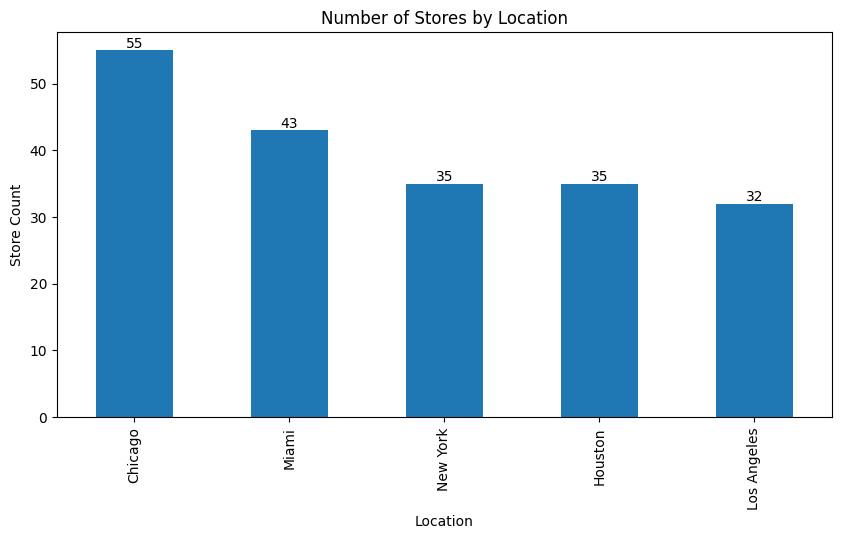

In [7]:
# to show number of stores in each to identify
import matplotlib.pyplot as plt
sl=store_counts.plot(kind='bar', figsize=(10,5))
sl.bar_label(sl.containers[0])
plt.title("Number of Stores by Location")
plt.xlabel("Location")
plt.ylabel("Store Count")
plt.show()

In [8]:
category_sales = df.groupby('product_category')['total_sales'].sum().reset_index()
print(category_sales)

  product_category  total_sales
0            Books        98644
1         Clothing       122420
2      Electronics       118110
3        Furniture       105595
4        Groceries       125121


In [9]:
category_sales = category_sales.sort_values(by='total_sales', ascending=False)
print(category_sales)

  product_category  total_sales
4        Groceries       125121
1         Clothing       122420
2      Electronics       118110
3        Furniture       105595
0            Books        98644


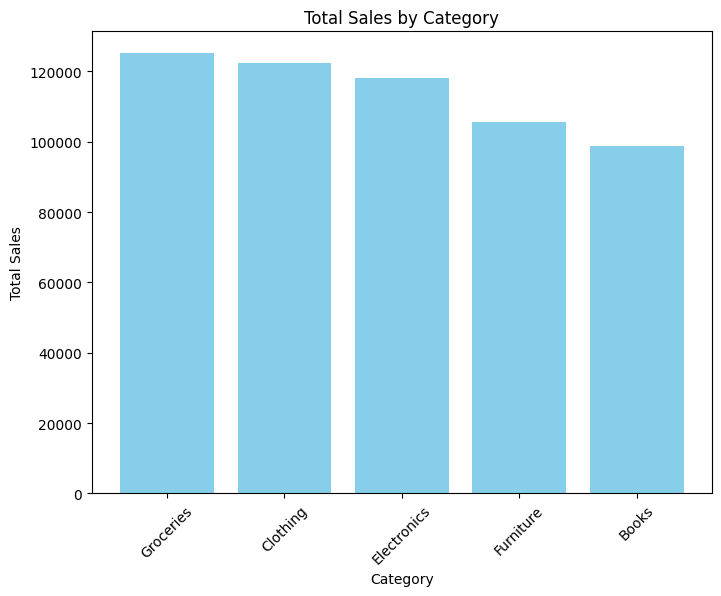

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(category_sales['product_category'], category_sales['total_sales'], color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [13]:
#testcase
###category wise total sales by its location
#motive 
#Identify best sellers per location
###Spot regional preferences
##Analyze
import pandas as pd
# Load dataset
df = pd.read_csv("retail_sales_dataset.csv")
# Group by store location, category, and product
sales_grouped = (
    df.groupby(['store_location', 'product_category'])['total_sales']
      .sum()
      .reset_index()
)
# Sort by sales descending
sales_grouped = sales_grouped.sort_values(by='total_sales', ascending=False)
sales_grouped

,store_location,product_category,total_sales
1,Chicago,Clothing,58440
24,New York,Groceries,33686
19,Miami,Groceries,33451
4,Chicago,Groceries,31400
17,Miami,Electronics,29624
10,Los Angeles,Books,28888
12,Los Angeles,Electronics,27840
3,Chicago,Furniture,27384
0,Chicago,Books,24500
2,Chicago,Electronics,23947


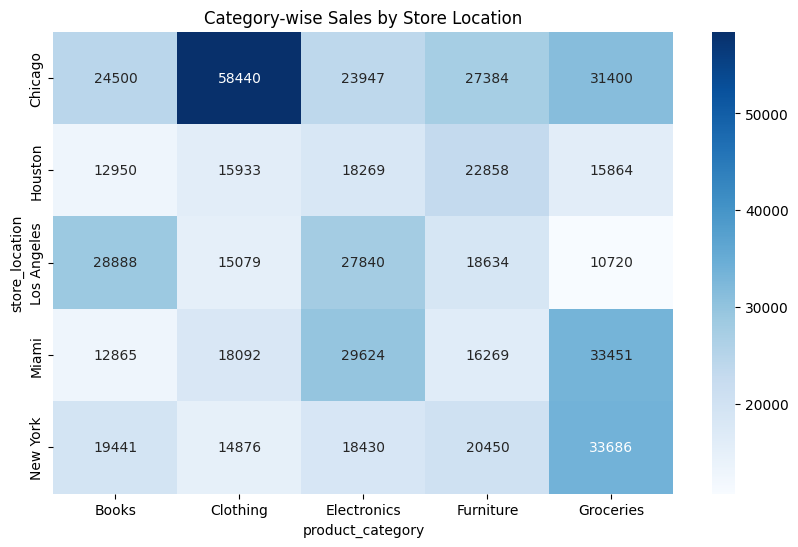

In [14]:
#visualize
import seaborn as sns
# Pivot table for heatmap
pivot_table = df.pivot_table(
    values='total_sales',
    index='store_location',
    columns='product_category',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Category-wise Sales by Store Location")
plt.show()